# IBM Coursera: Model development, Week 4

## 1- LINEAR REGRESSION AND MULTIPLE LINEAR REGRESSION

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#note : add the following line to plot in jupyter notebook
%matplotlib inline

path='http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
DF = pd.read_csv(path)
DF.replace('?',np.nan,inplace=True)

**Single Linear Regression (SLR)**
**$$Yhat=b_{0}+b_{1}X$$**

In [83]:
# 1-Import linear model from skilit-learn
from sklearn.linear_model import LinearRegression
# 2-Create a linear regression object using the constructor
lm=LinearRegression()
# 3-Train the model with the data
X=DF[['highway-mpg']]
Y=DF[['price']]
lm.fit(X,Y)
# 4-Obtain a prediction
Yhat=lm.predict(X)

In [63]:
# find the intercept b0
b0=lm.intercept_
b0

array([38423.30585816])

In [64]:
# find the slope
b1=lm.coef_
b1

array([[-821.73337832]])

**Multiple Linear Regression (MLR)**
**$$Yhat=b_{0}+b_{1}X_{1}+b_{2}X_{2}+...$$**

In [65]:
# 1-Extract the 4 predictors and store them in variable Z
Z=DF[['horsepower','curb-weight','engine-size','highway-mpg']]
Y=DF[['price']]
# 2-create a linear regression model
lm=LinearRegression()
# 3-Train the model
lm.fit(Z,Y)
# 4-Obtain a prediction
Yhat=lm.predict(Z)

In [66]:
# find the intercept b0
b0=lm.intercept_
b0

array([-15806.62462633])

In [67]:
# find the coefficients [b1,b2,...]
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

## 2- REGRESSION PLOT

(0.0, 48173.02267765667)

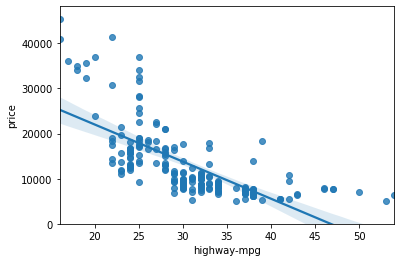

In [68]:
import seaborn as sns
sns.regplot(x='highway-mpg',y='price', data=DF)
plt.ylim(0)

## 3- RESIDUAL PLOT

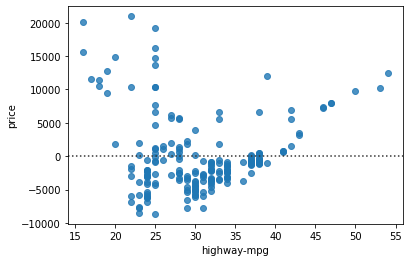

In [69]:
# create a residual plot
sns.residplot(x='highway-mpg',y='price',data=DF)

## 4- DISTRIBUTION PLOT

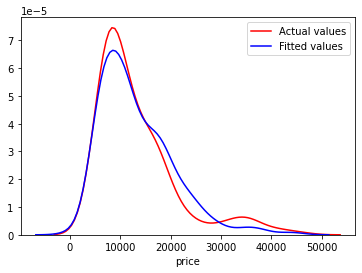

In [70]:
ax1=sns.distplot(DF['price'],hist=False,color='r', label='Actual values')
sns.distplot(Yhat,hist=False,color='b',label='Fitted values',ax=ax1)

## 5- POLYNOMIAL REGRESSION AND PIPELINES

In [71]:
# import modules
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [72]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),\
                                   ('mode',LinearRegression())]

In [73]:
Pipe=Pipeline(Input)

In [74]:
# Train the pipeline
Pipe.fit(DF[['horsepower','curb-weight','engine-size','highway-mpg']],Y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('mode',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [75]:
Yhat=Pipe.predict(Z[['horsepower','curb-weight','engine-size','highway-mpg']])
Yhat[[0,1,2,3],]

array([[13102.74784201],
       [13102.74784201],
       [18225.54572197],
       [10390.29636555]])

## 6- MEASURE MEAN-SQUARED ERROR

In [76]:
from sklearn.metrics import mean_squared_error
X=DF[['highway-mpg']]
Y=DF[['price']]
lm.fit(X,Y)
Yhat=lm.predict(X)
mean_squared_error(DF['price'],Yhat)

31635042.944639888

## 7- MEASURE R-SQUARED ERROR

In [77]:
X=DF[['highway-mpg']]
Y=DF[['price']]
lm.fit(X,Y)
Yhat=lm.predict(X)
lm.score(X,Y)

0.4965911884339176